In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pickleFile = pd.read_pickle("HW3.pkl")
LennaImg = pickleFile["Lenna"][0]
plt.imshow(LennaImg)
print(LennaImg)

[[[225 137 125]
  [224 137 130]
  [225 137 125]
  ...
  [233 149 125]
  [229 145 121]
  [211 115 101]]

 [[225 137 125]
  [224 137 130]
  [225 137 125]
  ...
  [233 149 125]
  [229 145 121]
  [211 115 101]]

 [[225 137 125]
  [225 136 130]
  [225 137 127]
  ...
  [233 149 125]
  [228 144 118]
  [211 115 101]]

 ...

 [[ 92  28  63]
  [ 90  26  61]
  [ 92  28  65]
  ...
  [157  63  79]
  [167  65  78]
  [164  62  76]]

 [[ 83  21  60]
  [ 89  23  59]
  [ 94  26  65]
  ...
  [168  67  81]
  [174  70  79]
  [177  67  80]]

 [[ 82  22  58]
  [ 90  30  58]
  [ 95  30  64]
  ...
  [175  71  82]
  [180  71  77]
  [183  74  80]]]


[[[225   0   0]
  [224   0   0]
  [225   0   0]
  ...
  [233   0   0]
  [229   0   0]
  [211   0   0]]

 [[225   0   0]
  [224   0   0]
  [225   0   0]
  ...
  [233   0   0]
  [229   0   0]
  [211   0   0]]

 [[225   0   0]
  [225   0   0]
  [225   0   0]
  ...
  [233   0   0]
  [228   0   0]
  [211   0   0]]

 ...

 [[ 92   0   0]
  [ 90   0   0]
  [ 92   0   0]
  ...
  [157   0   0]
  [167   0   0]
  [164   0   0]]

 [[ 83   0   0]
  [ 89   0   0]
  [ 94   0   0]
  ...
  [168   0   0]
  [174   0   0]
  [177   0   0]]

 [[ 82   0   0]
  [ 90   0   0]
  [ 95   0   0]
  ...
  [175   0   0]
  [180   0   0]
  [183   0   0]]]


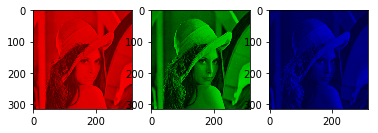

In [2]:
shape = LennaImg.shape
R = np.zeros((shape[0], shape[1], shape[2]), dtype = int)
G = np.zeros((shape[0], shape[1], shape[2]), dtype = int)
B = np.zeros((shape[0], shape[1], shape[2]), dtype = int)

R[:, :, 0] = LennaImg[:, :, 0]
G[:, :, 1] = LennaImg[:, :, 1]
B[:, :, 2] = LennaImg[:, :, 2]
f, axes = plt.subplots(1,3)
axes[0].imshow(R)
axes[1].imshow(G)
axes[2].imshow(B)
print(R)

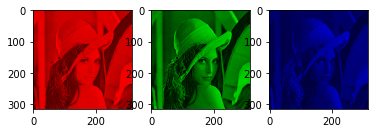

In [4]:
def convolutionOne(i, j, color, RGBIndex):
    sum = 0.0
    for _i in range(3):
        for _j in range(3):
            sum += color[i+_i, j+_j, RGBIndex]
    sum /= 9     
    return sum
for i in range(shape[0] - 2):
    for j in range(shape[1] - 2):
        R[i, j, 0] = convolutionOne(i, j, R, 0)
        G[i, j, 1] = convolutionOne(i, j, G, 1)
        B[i, j, 2] = convolutionOne(i, j, B, 2)
f, axes = plt.subplots(1,3)
axes[0].imshow(R)
axes[1].imshow(G)
axes[2].imshow(B)
#print(R)

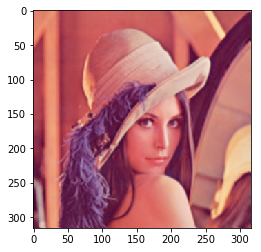

In [5]:
RGB = np.zeros((shape[0], shape[1], shape[2]), dtype = int)
for i in range(shape[0]):
    for j in range(shape[1]):
        RGB[i, j, 0] += R[i, j, 0]
        RGB[i, j, 1] += G[i, j, 1]
        RGB[i, j, 2] += B[i, j, 2]
plt.imshow(RGB)        
        
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


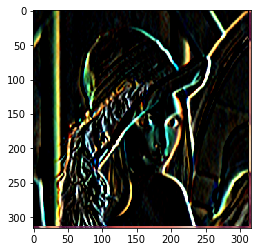

In [6]:
def convolutionTwo(i, j):
    sumR = 0
    sumG = 0
    sumB = 0
    for _i in range(4):
        for _j in range(4):
            if(_j >= 2):
                sumR -= RGB[i+_i, j+_j, 0]
                sumG -= RGB[i+_i, j+_j, 1]
                sumB -= RGB[i+_i, j+_j, 2]
            else:
                sumR += RGB[i+_i, j+_j, 0]
                sumG += RGB[i+_i, j+_j, 1]
                sumB += RGB[i+_i, j+_j, 2]
    #print([sumR, sumG, sumB])            
    return [sumR, sumG, sumB]          
    
for i in range(shape[0]-3):
    for j in range(shape[1]-3):
        RGB[i, j, :] = convolutionTwo(i, j)
        
plt.imshow(RGB)  